# Initialize
Load problem data, install packages

In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
#%load_ext autoreload
#%autoreload 2

# !pip install deap
# !git clone https://github.com/jekim526/IE-541-Project.git
# !git --git-dir=/content/IE-541-Project/.git pull

import pandas as pd
import numpy as np
import sys
sys.path.append("..")
sys.path.append('/content/IE-541-Project')
import knapsack_EA_functions as ea
import operators as op
import numpy
import random
import time
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/jekim526/IE-541-Project/main/data/Z_r_100_25_1.csv' # Get the "Raw" link
df1_o = pd.read_csv(url)
df1 = pd.DataFrame(df1_o).to_numpy() # DataFrame to nummpy array
n_size = len(df1) - 1

# Array of item value
item_value = [0] * n_size
for x in range(0,n_size):
  item_value[x] = df1[1,x+1]

# Array of item weight
item_weight = [0] * n_size
for x in range(0,n_size):
  item_weight[x] = df1[0,x+1]

# n x n array of joint profit
joint_profit = np.zeros((n_size,n_size))
for x in range(0, n_size-1):
  for y in range(0, n_size):
    joint_profit[x,y] = df1[x+2,y+1]

item_weight = np.array(item_weight)
item_value = np.array(item_value)

## Prepare the GA input and solve the instance via GA

In [3]:
# -------  NOTES: ------------------------------------------------------------------------------
# instance_setings should be a tuple contains:
# {item_value, item_weight, joint_profit, capacities}
#                 capacities = {capacity1, capacity2, ...}
#
# evolution_general_parameters should be a tuple contains:
# {popsize, swap_prob, mute_prob, punish_factor}, in which:
#    swap_prob is independent probability for swap at each point in uniform crossover.
#    mute_prob is independent probability for each attribute to be flipped in flip-bit mutation.
#
# evolution_specify_parameters should be a tuple contains: {CXPB, MUTPB, MAX_GEN, STOP_GEN},In which:
#    CXPB is the probability with which two individuals
#          are crossed
#    MUTPB is the probability for mutating an individual
#    MAX_GEN is the maximum generation threshold
#    STOP_GEN is the threshold of no progress generations

''' the maximize covalue_case '''
max_c = 0; max_c = max(max_c,max(np.sum(joint_profit,axis = 1))); max_c = max(max_c,max(np.sum(joint_profit,axis = 0)))
max_i = max(item_value)

''' prepare this solver inputs: '''
#initialize evolution parameter setting
evolution_general_parameters = (100, 0.2, 0.02, max_i + max_c)
evolution_specify_parameters = (0.5, 0.25, 1000, 1000)
num_of_knapsack = 5
capacity = (sum(item_weight)/num_of_knapsack)*0.8 # 80% of the sum of all item weights divided by the number of knapsacks
capacities = (capacity,)*num_of_knapsack
#initialize instance setting
instance_settings = (item_value, item_weight, joint_profit, capacities)

# Test of multi-threading

In [6]:
''' solve via GA in one line! '''
objf_type = 1
evolution_general_parameters = (100, 0.2, 0.02, max_i + max_c)
evolution_specify_parameters = (0.7, 0.5, 4000, 20000)
evolution_specify_parameters = (0.7, 0.5, 100, 20000)


# ------------------------- base GA multi-thread ---------------------------------
time_start=time.time()
best_ind,pop,num_gen,gen_log = ea.perform_GA_base_mt(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# best_ind,pop,num_gen,gen_log = ea.perform_GA_tugba_mt((objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# print(best_ind)
best_ind.fitness.values
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(best_ind.fitness.values)

time cost 68.41625380516052 s
(18988.0,)


In [7]:
# ------------------------- normal-thread ---------------------------------
time_start=time.time()
best_ind,pop,num_gen,gen_log = ea.perform_GA_base(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# best_ind,pop,num_gen,gen_log = ea.perform_GA_tugba((objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# print(best_ind)
best_ind.fitness.values
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(best_ind.fitness.values)

time cost 67.25804042816162 s
(18983.0,)


# Test on runing time for tugba & base
and find good parameters

In [ ]:
''' solve via GA in one line! '''
objf_type = 1
evolution_general_parameters = (100, 0.2, 0.02, max_i + max_c)
evolution_specify_parameters = (0.7, 0.5, 10000, 20000)
# objf_type = (0.5,0.5,0)
#objf_type: 
# 1: the first objective function (maximum the total profit)
# 2: maximum the negative of total_weight
# 3: maximum the profit of the package with minmum of profit
#

time_start=time.time()
best_ind,pop,num_gen,gen_log = ea.perform_GA_base(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# print(best_ind)
best_ind.fitness.values
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(best_ind.fitness.values)
plt.plot(gen_log)

**naive GA, the generation of running with the 1st Objf:**
generation(runing time): the objValues
1000(13s): 17942, 17376, 16251, 18258
2000: 17659, 17623
3000: 18630, 18515
4000: 18721, 18755
5000（44s): 18336
20000(177s): 19702
50000(472s): 20522

obj3:
2000(20s): 2670
4000(42s): 2791
20000(186s): 3385, 3126,
------------------------------ (0.7, 0.5) below
10000:  [50 pop size](60s) 2882, 3153
        [100 pop size](134s) 3533, 3471, 3456
        [200 pop size](313s) 3405, 3459
20000:  [50 pop size](142s) 3269


time cost 194.2175977230072 s
(19870.0,)


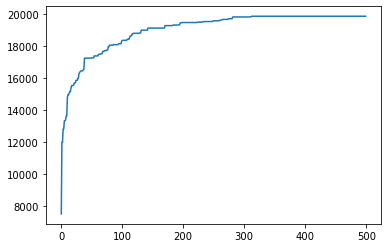

In [33]:
objf_type = 1
evolution_general_parameters = (100, 0.2, 0.02, max_i + max_c)
evolution_specify_parameters = (0.7, 0.3, 500, 1000)
import time
time_start=time.time()
best_ind,pop,num_gen,gen_log  = ea.perform_GA_tugba(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
# print(best_ind)
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(best_ind.fitness.values)
plt.plot(gen_log)

tugba GA, the generation of running:
500(134s): 20292, 19511, 19694, 19896
1000: 19138, 19825
2000(483s): 20113

obj3:
500(150s): 3279, 3098, 3206


In [14]:
#parameter test for GA_base
evolution_specify_parameters = (0.7, 0.7, 2000, 2000)
result = []
for i in range(10):
    best_ind,pop,num_gen,gen_log = ea.perform_GA_base(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
    result.append(best_ind.fitness.values)
print(np.mean(result))

17724.4
17816.9
17953.1


In [9]:
#parameter test for GA_base
evolution_specify_parameters = (0.7, 0.5, 2000, 2000)
result = []
for i in range(10):
    best_ind,pop,num_gen,gen_log = ea.perform_GA_base(objf_type, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
    result.append(best_ind.fitness.values)
print(np.mean(result))

18703.1


In [27]:
import operators as op
import numpy
import random
def exam_feasibility(individual, item_weight, capacities):
    if (numpy.sum(individual, axis=1) > 1).any():
        raise RuntimeError('Serious Issue: Item in Multi Knapsack')
    result = []
    # item_weight = instance_settings[1]
    # capacities = instance_settings[3]
    for k in range(individual.shape[1]):

        kth_knapsack = individual[:, k]
        weight = numpy.dot(kth_knapsack, item_weight)
        if weight > capacities[k]:
            result.append(False)
        else:
            result.append(True)
    return result

# TODO
def remove_to_feasible(pop, item_weight, capacities):
    pop_size = len(pop)
    item_num = pop[0].shape[0]
    knapsack_num = pop[0].shape[1]
    for ind in pop:
        if numpy.array(exam_feasibility(ind, item_weight, capacities)).all():
            continue
        contained_items = numpy.where(numpy.sum(ind, axis=1) == 1)[0]
        random.shuffle(contained_items)
        for i in contained_items:
            ind[i] = numpy.zeros(knapsack_num)
            if numpy.array(exam_feasibility(ind, item_weight, capacities)).all():
                break
    return pop

print(op.exam_feasibility(pop[1], item_weight, capacities))
print(op.exam_feasibility(pop[2], item_weight, capacities))
print(op.exam_feasibility(pop[12], item_weight, capacities))
remove_to_feasible(pop, item_weight, capacities)
print(op.exam_feasibility(pop[1], item_weight, capacities))
print(op.exam_feasibility(pop[2], item_weight, capacities))
print(op.exam_feasibility(pop[12], item_weight, capacities))

[False, True, False, True, True, False, True, True, True, False]
[True, True, True, True, True, False, True, True, True, True]
[False, True, True, True, True, True, True, True, True, False]
[True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True, True]


In [26]:
print(op.exam_feasibility(pop[12], item_weight, capacities))

[False, True, True, True, True, True, True, True, True, False]


In [38]:
import  numpy
import  random
def mutRandomRemove(ind, num_of_remove):
    item_num = ind.shape[0]
    knapsack_num = ind.shape[1]
    contained_items = numpy.where(numpy.sum(ind, axis=1) == 1)[0]
    random.shuffle(contained_items)
    for i in contained_items[0: min(len(contained_items),num_of_remove)]:
        ind[i] = numpy.zeros(knapsack_num)
    return ind
print(sum(best_ind))
mutRandomRemove(best_ind,2)
print(sum(best_ind))

[0 0 0]
[0 0 0]


In [23]:
print(np.dot(best_ind[:,0],item_weight))
print(np.dot(best_ind[:,1],item_weight))
print(np.dot(best_ind[:,2],item_weight))

5
0
0


In [21]:
decision_matrix = best_ind
total_weight = 0
item_weight = item_value.reshape(len(item_weight), 1)
for k in range(decision_matrix.shape[1]):
    kth_decision = decision_matrix[:, k]
    total_weight += np.dot(kth_decision, item_weight)
total_weight

Individual([0], dtype=int64)

In [22]:
import numpy
import random
def random_complete(ind, instance_settings):
    item_weight = instance_settings[1]
    capacities = instance_settings[3]
    rcapcity = capacities - numpy.dot(ind.T, item_weight)

    mylist = numpy.where(numpy.sum(best_ind, axis=1) == 0)[0]
    random.shuffle(mylist)

    num_knapsack = len(ind[0])
    knapsack_list = list(range(num_knapsack))
    random.shuffle(knapsack_list)
    for i in mylist:
        for k in knapsack_list:
            if item_weight[i] < rcapcity[k]:
                ind[i] = numpy.zeros(num_knapsack)
                ind[i, k] = 1
                rcapcity[k] -= item_weight[i]
                break
    return ind
pp1o = pop[5].copy()
pp1 = pop[5].copy()
print(capacities - numpy.dot(pp1.T, item_weight))
pp1 = random_complete(pp1, instance_settings)
print(capacities - numpy.dot(pp1.T, item_weight))
# # np.where(pp1o != pp2o)
np.where(pp1o != pp1)

[-22.46666667  60.53333333   1.53333333]


NameError: name 'random' is not defined

In [370]:
def exam_feasibility(individual, instance_settings):
    if (numpy.sum(individual,axis=1) > 1).any():
        raise RuntimeError('Serious Issue: Item in Multi Knapsack')
    result = []
    item_weight = instance_settings[1]
    capacities = instance_settings[3]
    for k in range(individual.shape[1]):

        kth_knapsack = individual[:, k]
        weight = numpy.dot(kth_knapsack, item_weight)
        if weight > capacities[k]:
            result.append(False)
        else:
            result.append(True)
    return result
pp1[0] = [1,1,0]
pp1
exam_feasibility(pp1, instance_settings)

RuntimeError: Serious Issue: Item in Multi Knapsack

In [72]:
from deap import base
import objfuncs as objf
import operators as op
ind1 = best_ind
indo = ind1.copy()
''' initialize population '''
toolbox = base.Toolbox()
toolbox.register("evaluate", objf.objf_weight, objc_weight_vector=(0.5,0,0.5), instance_settings=instance_settings,
                 punish_factor=-1000)
ee1 = list(map(toolbox.evaluate, [ind1]))
print(ee1)

def mutLocalSearch(ind, item_weight, capacities, toolbox):
    rcapcity = capacities - numpy.dot(ind.T, item_weight)
    curr_obj = list(map(toolbox.evaluate, [ind]))[0][0]
    item_num = ind.shape[0]
    knapsack_num = ind.shape[1]
    change_pair = [0] * op.get_combination_num(knapsack_num,2)
    kk = 0
    for i in range(knapsack_num):
        for j in range(i, knapsack_num):
            if j == i:
                continue
            change_pair[kk] = (i, j)
            kk += 1
    # If all are zero, no need to exchange
    for i in range(item_num):
        if sum(ind[i]) == 0:
            continue
        for m, n in change_pair:
            if ind[i, m] == 0 and ind[i, n] == 0:
                continue
            # If it makes the instance infeasible no need to exchange
            change_m = (- ind[i, m] + ind[i, n]) * item_weight[i]
            change_n = (- ind[i, n] + ind[i, m]) * item_weight[i]
            if rcapcity[m] + change_m < 0:
                continue
            if rcapcity[n] + change_n < 0:
                continue
            # if it not increases the joint_value, (maybe) no need to exchange
            # ....
            # Now try exchange, see if it increases the ObjValue
            ind[i, m], ind[i, n] = ind[i, n], ind[i, m]
            new_obj = list(map(toolbox.evaluate, [ind]))[0][0]
            if curr_obj > new_obj:  # did not increase the ObjValue, change back
                ind[i, m], ind[i, n] = ind[i, n], ind[i, m]
                continue
            curr_obj = new_obj
            rcapcity[m] -= change_m
            rcapcity[n] -= change_n
    return ind
nind = mutLocalSearch(ind1, item_weight, capacities, toolbox)
print(list(map(toolbox.evaluate, [nind])))

[[13478.0]]
[[13478.0]]


In [49]:
list(map(toolbox.evaluate, ind1))

IndexError: tuple index out of range

In [5]:
evolution_general_parameters = (100, 0.1, 0.1, 200)
evolution_specify_parameters = (0.5, 0.25, 200, 100)
best_ind,pop,num_gen = ea.perform_GA_base(1, instance_settings, evolution_general_parameters, evolution_specify_parameters, PRINT=False)
best_ind.fitness.values

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


(15025.0,)

Since above naive GA amazingly always produce feasibile solution, I want to verify my implementation of `exam_feasibility`. The exam below shows my implementation of `exam_feasibility` is correct.

In [ ]:
#Output the best individual as .csv file
import pandas as pd
df_best_ind = pd.DataFrame(best_ind.T)
df_best_ind.to_csv("/content/best_ind.csv")